In [1]:
library(tidyverse)
library(igraph)

source('../utils/plottingUtilities.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: scales


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

  

In [2]:
# from this, we really just need late$template
load('../data/lateData.Rdata')

In [3]:
# load irf fits
load('../scripts/irf_fits_2020-02-25/irfSpatialFit_eye_set19pp.Rdata')

In [4]:
ls()

[1] "fit"             "generateImage"   "getNodeImages"   "getNodeLabel"   
 [5] "getNodePosition" "img2Color"       "late"            "mapLate2Early"  
 [9] "multiplot"       "overlayImage"    "overlayImages"   "plot_all_PPs"   
[13] "plotGroupImg"    "plotImg"         "plotPP"          "shiftHoriz"     
[17] "shiftImg"        "shiftVert"       "test.id"         "tf"             
[21] "train.id"        "x.late"          "y.late"

# get interactions

In [5]:
interactions <- fit$interaction[, 1]

In [6]:
interactions

[1] "eya_1.1+_larp-"   "eya_1.1+_rib-"    "ImpE2+_Tkr+"      "Tkr.1+_Tkr+"     
 [5] "eya_1.1+_srp_2-"  "eya_1.1+_tkv-"    "eya_1.1+_LanA-"   "chif-_eya_1.1+"  
 [9] "eya_1.1+_Tom40+"  "CG10220+_Tkr+"    "D1+_Tkr+"         "ran+_Tkr+"       
[13] "Optix+_Tkr-"      "Pcaf+_Tkr+"       "eya_1.1-_Optix+"  "CG1021+_Tkr+"    
[17] "eya_1+_Tkr-"      "Rab.RP3+_Tkr+"    "mira+_Tkr+"       "Idgf4-_Tkr-"     
[21] "NaPi.T-_Tkr+"     "Rab23+_Tkr+"      "Sap.r+_Tkr+"      "CG11076+_Tkr+"   
[25] "CG1637+_Tkr+"     "eya_1.1+_Tkr+"    "Stat92E+_Tkr+"    "h+_Tkr+"         
[29] "eya_1.1+_NaPi.T-" "Tkr+_tkv+"

In [7]:
# first gene
interaction1 <- gsub('[+, -]_.*', "", unlist(interactions))
print(interaction1)

sign1 <- substr(interactions,nchar(interaction1)+1,nchar(interaction1)+1)

 [1] "eya_1.1" "eya_1.1" "ImpE2"   "Tkr.1"   "eya_1.1" "eya_1.1" "eya_1.1"
 [8] "chif"    "eya_1.1" "CG10220" "D1"      "ran"     "Optix"   "Pcaf"   
[15] "eya_1.1" "CG1021"  "eya_1"   "Rab.RP3" "mira"    "Idgf4"   "NaPi.T" 
[22] "Rab23"   "Sap.r"   "CG11076" "CG1637"  "eya_1.1" "Stat92E" "h"      
[29] "eya_1.1" "Tkr"    


In [8]:
# second_gene
interaction2 <- gsub('.*[+, -]_', "", unlist(interactions))

sign2 <- substr(interaction2,nchar(interaction2),nchar(interaction2)) 

interaction2 <- substr(interaction2,1,nchar(interaction2)-1) 

In [9]:
interaction2

[1] "larp"    "rib"     "Tkr"     "Tkr"     "srp_2"   "tkv"     "LanA"   
 [8] "eya_1.1" "Tom40"   "Tkr"     "Tkr"     "Tkr"     "Tkr"     "Tkr"    
[15] "Optix"   "Tkr"     "Tkr"     "Tkr"     "Tkr"     "Tkr"     "Tkr"    
[22] "Tkr"     "Tkr"     "Tkr"     "Tkr"     "Tkr"     "Tkr"     "Tkr"    
[29] "NaPi.T"  "tkv"

In [10]:
# just check for my sanity regex logic is correct
all(interactions == paste0(interaction1, sign1, '_', interaction2, sign2))

[1] TRUE

# Plot a few interactoins

In [11]:
indx <- seq(1, 8)

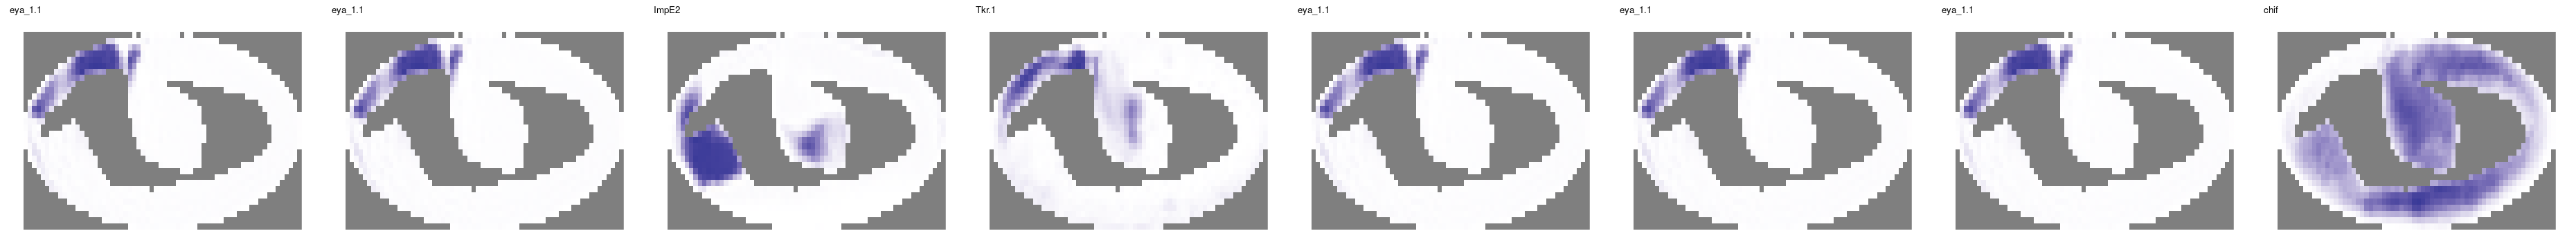

In [12]:
p <- list()

for(i in 1:length(indx)){
    gene <- interaction1[indx[i]]
    p[[i]] <- plotImg(x.late[, gene], late$template, FALSE, gene)       
}

options(repr.plot.width = 31, repr.plot.height = 3)
multiplot(plotlist = p, cols = length(indx))


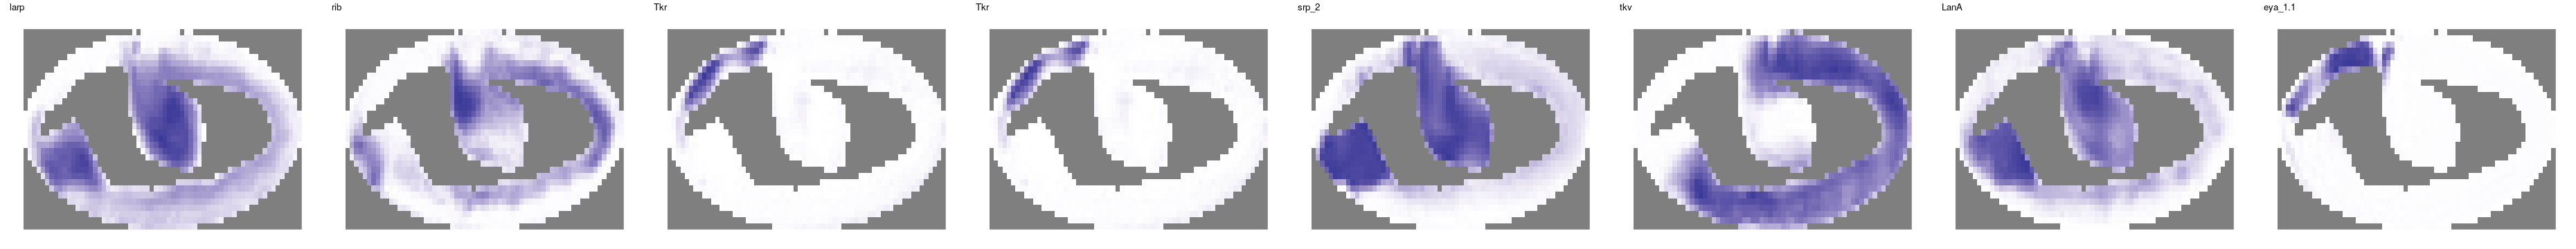

In [13]:
p <- list()

for(i in 1:length(indx)){
    gene <- interaction2[indx[i]]
    p[[i]] <- plotImg(x.late[, gene], late$template, FALSE, gene)       
}

options(repr.plot.width = 31, repr.plot.height = 3)
multiplot(plotlist = p, cols = length(indx))


In [14]:
interactions[indx]

[1] "eya_1.1+_larp-"  "eya_1.1+_rib-"   "ImpE2+_Tkr+"     "Tkr.1+_Tkr+"    
[5] "eya_1.1+_srp_2-" "eya_1.1+_tkv-"   "eya_1.1+_LanA-"  "chif-_eya_1.1+"

# Construct graph

In [15]:
unique.genes <- unique(c(interaction1, interaction2))

In [16]:
network.mat <- matrix(rep(0, length(unique.genes)**2), ncol = length(unique.genes))
colnames(network.mat) <- unique.genes
rownames(network.mat) <- unique.genes

In [17]:
stability.scores <- fit$interaction[, 'stability'] + 1e-6

In [18]:
edges <- rep(0, length(interaction1))
for(i in 1:length(interaction1)){
    gene1 <- interaction1[i]
    gene2 <- interaction2[i]
    
    if(sign1[i] == sign2[i]){
        network.mat[gene1, gene2] <- 1 * stability.scores[i]
        network.mat[gene2, gene1] <- 1 * stability.scores[i]
    }
    if(sign1[i] != sign2[i]){
        network.mat[gene1, gene2] <- -1 * stability.scores[i]
        network.mat[gene2, gene1] <- -1 * stability.scores[i]
    }
        
}

In [19]:
iRF.graph <- graph_from_adjacency_matrix(network.mat, weighted = TRUE,
                                   diag = FALSE, 
                                    mode = 'upper')


In [20]:
la <- layout_with_dh(iRF.graph)

In [21]:
E(iRF.graph)$color[E(iRF.graph)$weight > 0] <- 'red'
E(iRF.graph)$color[E(iRF.graph)$weight < 0] <- 'blue'

In [22]:
E(iRF.graph)$width <- abs(E(iRF.graph)$weight) * 10

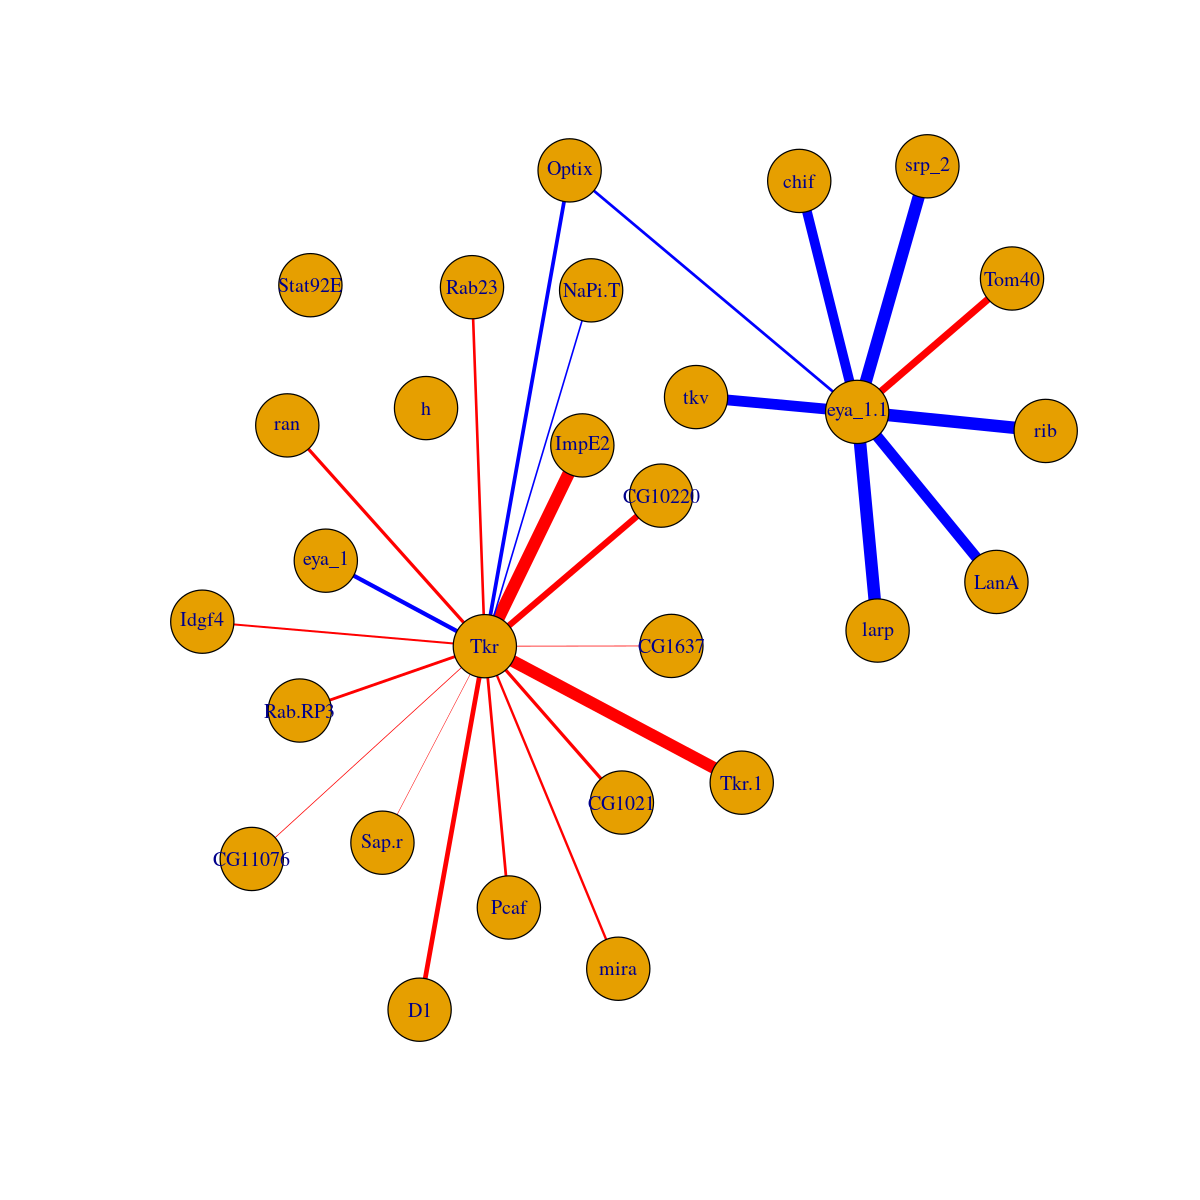

In [23]:
options(repr.plot.width = 10, repr.plot.height = 10)
plot(iRF.graph, layout = la, edge.width=E(iRF.graph)$width)

In [24]:
interactions

[1] "CG13900-_Pdp1.1+"  "CG6695.1-_Pdp1.1+" "Pdp1.1+_Ssdp-"    
 [4] "CG7265-_Pdp1.1+"   "CG10645-_Pdp1.1+"  "inx2.1-_Pdp1.1+"  
 [7] "Pdp1.1+_wg-"       "Pdp1.1+_Ptx1+"     "ial-_Pdp1.1+"     
[10] "Klp3A-_Pdp1.1+"    "Pdp1.1+_Ugt36Bc+"  "CG10689-_Pdp1.1+" 
[13] "Pdp1.1+_wg.1-"     "Idgf4+_Pdp1+"      "Pdp1+_Ugt36Bc+"   
[16] "CG10670-_Pdp1.1+"  "dm.1+_Pdp1.1+"     "Pdp1+_wg-"        
[19] "Pdp1+_Rapgap1+"    "Ptx1+_Rapgap1+"    "dm.1+_Ptx1+"      
[22] "dan-_Pdp1.1+"      "Klp3A-_Pdp1+"      "CG5971-_Pdp1.1+"  
[25] "CG9232+_Pdp1.1+"   "ial+_Ptx1+"        "Idgf4+_Pdp1.1+"   
[28] "dm.4+_Pdp1.1+"     "ial-_Pdp1+"        "pad.1+_Pdp1.1+"   
[31] "CG10645+_Pdp1+"